In [10]:
#@title Run this cell if you have issues installing pywdf in py3.9
! pip install -U setuptools==58.0.4

     -------------------------------------- 816.5/816.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 40.2.0
    Uninstalling setuptools-40.2.0:
      Successfully uninstalled setuptools-40.2.0


In [12]:
! pip install git+https://github.com/gusanthon/pywdf

  Cloning https://github.com/gusanthon/pywdf to c:\users\pau\appdata\local\temp\pip-req-build-teot7zny
  Resolved https://github.com/gusanthon/pywdf to commit 93075aa0367810d1d4f9aaca20869922ea05edd4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pywdf: filename=pywdf-0.0.1-py3-none-any.whl size=24487 sha256=5b0d353a42d4e74c36de933d9ce54a4981569c43ec2ba2dc2ea9d876a1e678b6
  Stored in directory: C:\Users\Pau\AppData\Local\Temp\pip-ephem-wheel-cache-6xdgb6zs\wheels\12\ac\53\4b212a623012b07bf64ae3fc350b55945030ab936909ab0650
Successfully built pywdf


  Running command git clone --filter=blob:none --quiet https://github.com/gusanthon/pywdf 'C:\Users\Pau\AppData\Local\Temp\pip-req-build-teot7zny'


In [1]:
import IPython
import pywdf
from pywdf.examples.rclowpass import RCLowPass
from pywdf.examples.lc_oscillator import LCOscillator
from pywdf.examples.diodeclipper import DiodeClipper
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

**WDF Diode Clipper**

C:\Users\Pau\Anaconda3\lib\site-packages\scipy\fftpack\basic.py:153: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  x = x[index]


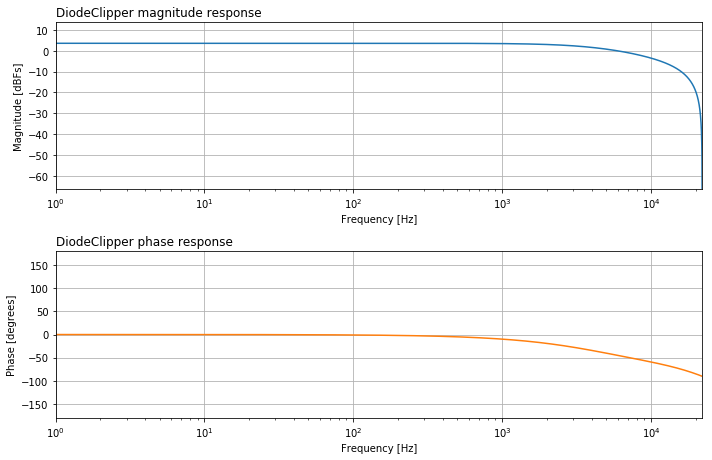

In [2]:
dc = DiodeClipper(44100, cutoff=5000, input_gain_db=5)
dc.plot_freqz()

**Processing a signal with the WDF Diode Clipper**

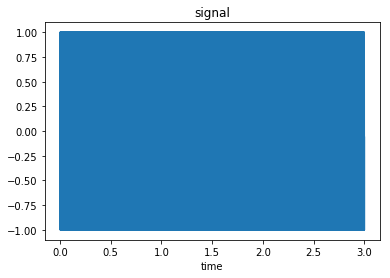

In [3]:
SR = 44100
t = np.arange(0,3,1/SR)
freq = 440
A = 1
signal = A * np.sin(2*np.pi * freq * t)

plt.plot(t, signal)
plt.title('signal')
plt.xlabel('time')
plt.show()

IPython.display.display(IPython.display.Audio(data=signal, rate=SR))

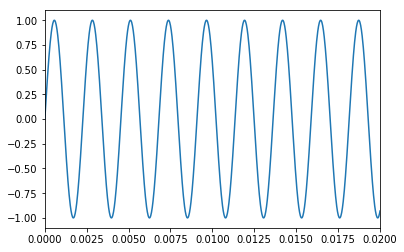

In [4]:
plt.plot(t, signal)
plt.xlim(0,0.02)
plt.show()

In [5]:
signal = np.array(signal)
processed_signal = dc.process_signal(signal)

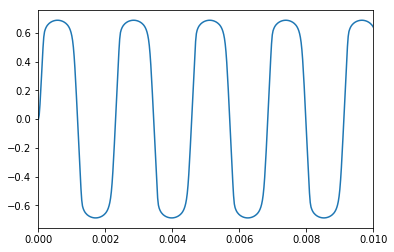

In [6]:
plt.plot(t, processed_signal)
plt.xlim(0,0.01)
plt.show()
IPython.display.display(IPython.display.Audio(data=processed_signal, rate=SR))

Let's change the input gain and process the signal again to distort it more

In [7]:
dc.set_input_gain(50.0)
processed_signal = dc.process_signal(signal)

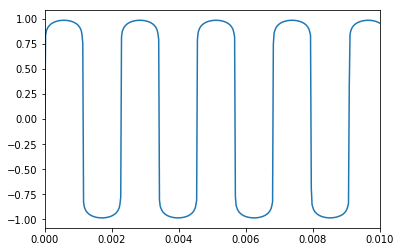

In [8]:
plt.plot(t, processed_signal)
plt.xlim(0,0.01)
plt.show()
IPython.display.display(IPython.display.Audio(data=processed_signal, rate=SR))

Let's process a more complex signal

In [15]:
IPython.display.Audio("../resources/guitar_riff.wav")

In [22]:
from scipy.io.wavfile import write
from scipy.io.wavfile import read

sr, complex_signal = read("../resources/guitar_riff.wav")
complex_signal = np.array(complex_signal)

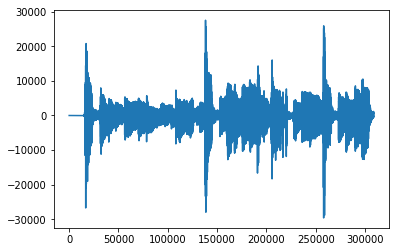

In [11]:
plt.plot(complex_signal)
plt.show()

In [18]:
dc.set_input_gain(0.1)
processed_signal = dc.process_wav("../resources/guitar_riff.wav")

In [19]:

IPython.display.display(IPython.display.Audio(data=processed_signal, rate=SR))